<a href="https://colab.research.google.com/github/DevanWestley/AI_CourseDEIE/blob/main/Deep_network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Deep Neural Network using Python**

#### Compiled by Devan Westley
**Diclaimer:** <br/> This modul is the intermediate version of "Week 11-Introduction to Deep Learning using Python". The code includes more sophisticated methods to better train the deep learning model.

The modul is part of hands on supplement for undergraduate course "Kecerdasan Buatan" (Artificial Intelligence) in The Department of Electrical and Information Engineering, Faculty of Engineering, Universitas Gadjah Mada, Indonesia. All codes are for solely educational purposes to explain lecture materials and provide deeper understanding on the presented materials. <br/><br/>

### Objective of the Jupyter notebook:

* Learning how to use Python and Keras to build deep neural network
* Learning how to visualize training data (MNIST)
* Learning how to train deep neural network to classify hand writing images

### **Deep neural network**
This code is a demonstration of a deep neural network on MNIST dataset. MNIST dataset is a standard dataset used in most deep learning tutorials. In this code, we have nine layers of neural network for handwritten digits classification.
*   The first layer is input layer, consisted of 784 nodes.
*   The 2nd, 4th, 6th layers are hidden layer with 64 sigmoid neurons.
*   The 3rd, 5th, 6th layers are batch normalization layers.
*   The 8th layer is the dropout layer (explained in the CNN course)
*   The last layer is an output layer with 10 softmax neurons.

#### Load dependencies

In [ ]:
#!pip install np_utils
#!pip install keras tensorflow

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout #avoiding overfitting
from tensorflow.keras.layers import BatchNormalization #improving training quality

#additional code for keras 2.4.0
#from keras.utils import np_utils

from keras.src.utils.np_utils import to_categorical
#from keras.utils import np_utils

from keras.optimizers import SGD
#from keras.optimizers import gradient_descent_v2
#then use it : sgd = gradient_descent_v2.SGD(...)

from matplotlib import pyplot as plt

#### Loading MNIST data

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

Checking 12 first labels from the training data

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

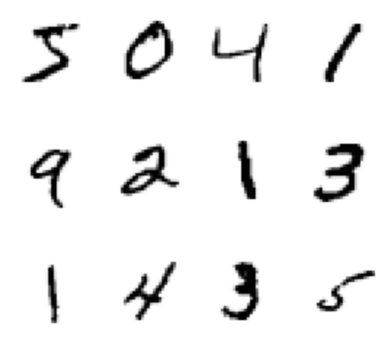

In [ ]:
plt.figure(figsize=(4,4))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show

In [ ]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

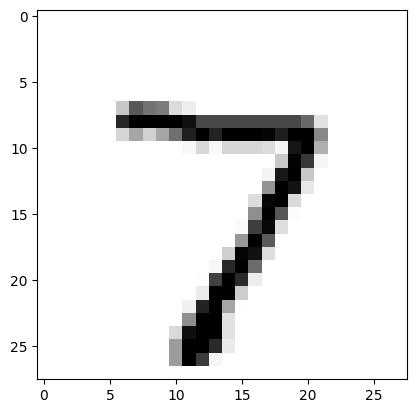

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')

#### Data preprocessing

Reshaping the data from 2D to 1D

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

Normalizing the data to be 0 to 1

In [ ]:
X_train = X_train/255
X_valid = X_valid/255

In [ ]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Converting integer labels to one-hot encoding. We arrange the labels with such one-hot encodings so that they line up with the 10 probabilities being output by the final layer of our artificial neural network. They represent the ideal output that we are striving to attain with our network: If the input image is a handwritten seven, then a perfectly trained network would output a probability of 1.00 that it is a seven and a probability of 0.00 for each of the other nine classes of digits.

In [ ]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes) #deprecated code for upgraded keras==2.4.0 and tensorflow==2.3.0
y_valid = keras.utils.to_categorical(y_valid, n_classes)
#y_train = keras.utils.utils.to_categorical(y_train, n_classes)
#y_valid = keras.utils.utils.to_categorical(y_valid, n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Designing a deep neural network architecture

In [ ]:
#initiating feed forward neural network
model = Sequential()

#layer 1: input with 784 nodes
#layer 2: dense layer with 64 relu nodes
model.add(Dense(64, activation='relu', input_shape=(784,)))

#layer 3: batch normalization
model.add(BatchNormalization())

#layer 4: dense layer with 64 relu nodes
model.add(Dense(64, activation='relu'))

#layer 5: batch normalization
model.add(BatchNormalization())

#layer 6: dense layer with 64 relu nodes
model.add(Dense(64, activation='relu'))

#layer 7: batch normalization
model.add(BatchNormalization())

#layer 8: drop out layer
model.add(Dropout(0.2))

#layer 9: output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_5 (Bat  (None, 64)               

#### Training the deep neural network

In [ ]:
#the commented code is from previous notebook (shallow network)
#model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#configure lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#the commented code is from previous notebook (shallow network)
#model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

#train model with batch size of 128
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 7s 6ms/step - loss: 0.3814 - accuracy: 0.8856 - val_loss: 0.1599 - val_accuracy: 0.9487
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1561 - accuracy: 0.9538 - val_loss: 0.1234 - val_accuracy: 0.9619
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1135 - accuracy: 0.9653 - val_loss: 0.1127 - val_accuracy: 0.9643
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0898 - accuracy: 0.9716 - val_loss: 0.0984 - val_accuracy: 0.9692
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0965 - val_accuracy: 0.9699
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.0982 - val_accuracy: 0.9702
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0608 - accuracy: 0.9806 - val_loss: 0.0899 - val_accuracy: 0.9719
Epoch 

In [ ]:
#evaluate the model
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9753


[0.09486755728721619, 0.9753000140190125]

**Displaying curves of loss and accuracy during training**

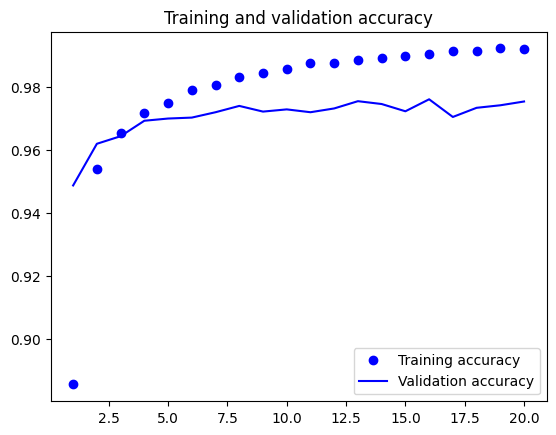

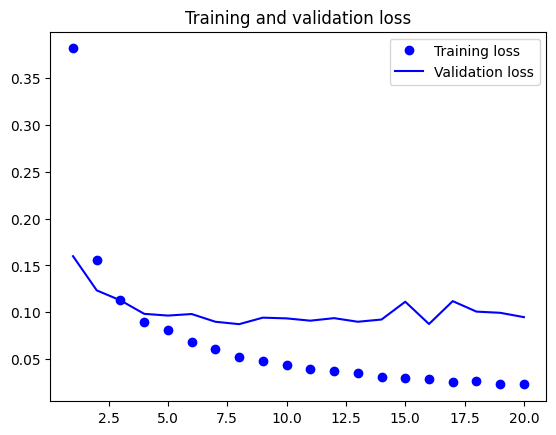

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Summary

In this notebook, we present an intermediate version of deep neural network to classify MNIST images. We added more layers and included drop out technique to avoid overfitting. Compared with previous shallow network, our deep network achieves better accuracy.
Despite of the validation accuracy, we can improve performance of the neural network by providing feature extraction architecture before passing the data to the dense neural network architecture. This is the heart of CNN algorithm that we will learn in the next lecture.